In [1]:
import os
import tempfile
import urllib

import pandas as pd

from cell_type_naming import nice_to_weirds, weird_to_nice

In [2]:
# experiment_name = "defaults"
# experiment_name = "with_bmode"
# experiment_name = "refsample_from_webjob4"
# experiment_name = "refsample_from_webjob4,with_bmode"  # works only with SINGLE_CELL = FALSE
# experiment_name = "refsample_from_webjob4,with_sourcegeps"
# experiment_name = "refsample_from_defaults"
# experiment_name = "refsample_from_defaults,with_bmode"  # works only with SINGLE_CELL = FALSE
# experiment_name = "sigmat_from_defaults"
# experiment_name = "sigmat_from_defaults,with_bmode"
# experiment_name = "sigmat_from__refsample_from_defaults,with_bmode"
# experiment_name = "sigmat_from_defaults,with_bmode,sourcegeps_from_defaults,sourcegeps_in_main_dir"
# experiment_name = "sigmat_from_webjob4"
# experiment_name = "sigmat_from_webjob4,with_bmode"
# experiment_name = "sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4"  # batchco fails, can't read sourceGEPs. SINGLE_CELL = FALSE doesn't help.
# experiment_name = "sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4,sourcegeps_in_main_dir"  # batchco fails, can't read sourceGEPs


experiment_uri = os.path.join("gs://liulab/csx_experiments/varying_simple_parameters", experiment_name)

print(experiment_name)
print(experiment_uri)

!tree -h {experiment_uri.replace("gs://", "/mnt/buckets/")}

sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4
gs://liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4
/mnt/buckets/liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4
├── [4.3K]  CIBERSORTx_Results.txt
└── [   0]  in
    ├── [6.0M]  mixturestirosh.txt
    ├── [171K]  sigmatrixwebjob4.txt
    └── [1.1M]  sourcegepswebjob4.txt

1 directory, 4 files


In [3]:
!gsutil ls gs://liulab/downloaded_manually/refsamples_from_csx_website/

gs://liulab/downloaded_manually/refsamples_from_csx_website/
gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_cell_type_sourceGEP.txt
gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_phenoclasses.CIBERSORTx_Job4_myrefsample_inferred_refsample.bm.K999.txt
gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_phenoclasses.txt
gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_refsample.txt


In [4]:
class InputFile:
    def __init__(self, target_filename, source_uri):
        self.target_filename = target_filename
        self.source_uri = source_uri

input_file_args = {
    "mixture": InputFile("mixturestirosh.txt", "gs://liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/mixture_melanoma_Tirosh_SuppFig_3b-d.txt"),
#     "refsample": InputFile("screfsampletirosh.txt", "gs://liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/scRNA-Seq_reference_melanoma_Tirosh_SuppFig_3b-d.txt"),
#     "refsample": InputFile("inferredrefsamplewebjob4.txt", "gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_refsample.txt"),
#     "refsample": InputFile("inferredrefsampledefaults.txt", "gs://liulab/csx_experiments/varying_simple_parameters/defaults/CIBERSORTx_screfsampletirosh_inferred_refsample.txt"),
#     "refsample": InputFile("foo", "gs://liulab/csx_experiments/varying_simple_parameters/defaults/CIBERSORTx_screfsampletirosh_inferred_refsample.txt"),
#     "phenoclasses": InputFile("inferredphenoclasseswebjob4.txt", "gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_phenoclasses.txt"),
#     "phenoclasses": InputFile("inferredphenoclassesdefaults.txt", "gs://liulab/csx_experiments/varying_simple_parameters/defaults/CIBERSORTx_screfsampletirosh_inferred_phenoclasses.txt"),
#     "phenoclasses": InputFile("bar", "gs://liulab/csx_experiments/varying_simple_parameters/defaults/CIBERSORTx_screfsampletirosh_inferred_phenoclasses.txt"),
    "sourceGEPs": InputFile("sourcegepswebjob4.txt", "gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_cell_type_sourceGEP.txt"),
#     "sourceGEPs": InputFile("sourcegepsdefaults.txt", "gs://liulab/csx_experiments/varying_simple_parameters/defaults/CIBERSORTx_cell_type_sourceGEP.txt"),
    "sigmatrix": InputFile("sigmatrixwebjob4.txt", "gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_phenoclasses.CIBERSORTx_Job4_myrefsample_inferred_refsample.bm.K999.txt"),
#     "sigmatrix": InputFile("sigmatrixdefaults.txt", "gs://liulab/csx_experiments/varying_simple_parameters/defaults/CIBERSORTx_screfsampletirosh_inferred_phenoclasses.CIBERSORTx_screfsampletirosh_inferred_refsample.bm.K999.txt"),
#     "sigmatrix": InputFile("sigmatfrombrokenexperiment.txt", "gs://liulab/csx_experiments/varying_simple_parameters/refsample_from_defaults,with_bmode/CIBERSORTx_nferredphenoclassesdefaults.CIBERSORTx_nferredrefsampledefaults.bm.K999.txt"),
}

other_args = {
    "rmbatchBmode" : "TRUE",
    "single_cell": "FALSE",
}

In [5]:
class DockerJob:
    def __init__(self, path, csx_input_files, other_args):
        self.path = path
        self.csx_input_files = csx_input_files
        self.other_args = other_args

    def copy_over_input_files(self):
        for file_arg, input_file in self.csx_input_files.items():
            target_path = os.path.join(self.path, "in", input_file.target_filename)
            !gsutil cp {input_file.source_uri} {target_path}

    def make_command(self):
        command = f'''docker run \
    --rm \
    -v {self.path}/in:/src/data \
    -v {self.path}:/src/outdir \
    --user "$(id -u):$(id -g)" \
    cibersortx/fractions:latest \
    --username lyronctk@stanford.edu \
    --token dfeba2c8b9d61daebee5fa87026b8e56 \
    --replicates 5 \
    --sampling 0.5 \
    --fraction 0.75 \
    --k.max 999 \
    --q.value 0.01 \
    --G.min 300 \
    --G.max 500 \
    --filter FALSE \
    --QN FALSE \\'''.replace("     ", " \\\n    ")
        for arg, input_file in self.csx_input_files.items():
            command += f"\n    --{arg} {input_file.target_filename} \\"
        for arg, value in self.other_args.items():
            command += f"\n    --{arg} {value} \\"
        command += "\n    --verbose TRUE"
        return command


## configure and run cibersortx

In [6]:
with tempfile.TemporaryDirectory() as temp_dir:
    job = DockerJob(temp_dir, input_file_args, other_args)
    job.copy_over_input_files()
    !tree -h {job.path}
    command = job.make_command()
    print(command)
    !{command}
    !tree -h {job.path}
    !gsutil -m rsync -r -d {job.path} {experiment_uri}
    !tree -h {experiment_uri.replace("gs://", "/mnt/buckets/")}

Copying gs://liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/mixture_melanoma_Tirosh_SuppFig_3b-d.txt...
/ [1 files][  6.0 MiB/  6.0 MiB]                                                
Operation completed over 1 objects/6.0 MiB.                                      
Copying gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_cell_type_sourceGEP.txt...
/ [1 files][  1.1 MiB/  1.1 MiB]                                                
Operation completed over 1 objects/1.1 MiB.                                      
Copying gs://liulab/downloaded_manually/refsamples_from_csx_website/CIBERSORTx_Job4_myrefsample_inferred_phenoclasses.CIBERSORTx_Job4_myrefsample_inferred_refsample.bm.K999.txt...
/ [1 files][170.9 KiB/170.9 KiB]                                                
Operation completed over 1 objects/170.9 KiB.                                    
/tmp/tmpe3q6p00x
└── [4.0K]  in
    ├── [6.0M]  mixturestirosh.txt
    ├── [171K]  sigmatrixwebj

In [7]:
!tree -h {experiment_uri.replace("gs://", "/mnt/buckets/")}

/mnt/buckets/liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4
├── [4.3K]  CIBERSORTx_Results.txt
└── [   0]  in
    ├── [6.0M]  mixturestirosh.txt
    ├── [171K]  sigmatrixwebjob4.txt
    └── [1.1M]  sourcegepswebjob4.txt

1 directory, 4 files


# sanity check results

In [8]:
fractions_csx = pd.read_csv(
    os.path.join(experiment_uri, 
                 "CIBERSORTx_Results.txt"
#                  "CIBERSORTx_Adjusted.txt"
                ),
    sep="\t",
    index_col=0
).rename_axis(index="mixture_id").rename(columns=weird_to_nice).iloc[:, :-3]

fractions_csx

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
mixture_id,,,,,,,,
53,0.047880,0.028316,0.076755,0.236612,0.184615,0.090988,0.334834,0.000000
58,0.000000,0.000000,0.002522,0.553786,0.075689,0.012412,0.326092,0.029499
59,0.727589,0.000000,0.246718,0.000000,0.000285,0.025408,0.000000,0.000000
60,0.022617,0.000123,0.000000,0.199275,0.059760,0.061670,0.224872,0.431683
65,0.061793,0.000000,0.000000,0.274881,0.012322,0.037578,0.535170,0.078255
67,0.000000,0.000000,0.000000,0.321762,0.013452,0.001472,0.484256,0.179059
71,0.440183,0.000371,0.003036,0.378757,0.025195,0.037050,0.114802,0.000605
72,0.000000,0.000000,0.000000,0.000000,0.006934,0.007764,0.745084,0.240218
74,0.000000,0.000000,0.000060,0.607619,0.040344,0.049826,0.225715,0.076436


In [9]:
!gsutil ls -R {experiment_uri}

gs://liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4/:
gs://liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4/CIBERSORTx_Results.txt

gs://liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4/in/:
gs://liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4/in/mixturestirosh.txt
gs://liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4/in/sigmatrixwebjob4.txt
gs://liulab/csx_experiments/varying_simple_parameters/sigmat_from_webjob4,with_bmode,sourcegeps_from_webjob4/in/sourcegepswebjob4.txt


In [10]:
fractions_truth = pd.read_csv(
    "gs://liulab/csx_example_files/groundtruth_Melanoma_Tirosh_et_al_SuppFig3b-d.txt",
    sep="\t",
    index_col=0,
).rename_axis(index="mixture_id").rename(columns=weird_to_nice)

fractions_truth

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
mixture_id,,,,,,,,
53,0.1280,0.0880,0.0320,0.2000,0.0800,0.0960,0.3760,0.0000
58,0.0000,0.0000,0.0000,0.6508,0.0317,0.0159,0.2857,0.0159
59,0.8710,0.0000,0.1129,0.0000,0.0000,0.0161,0.0000,0.0000
60,0.0448,0.0000,0.0000,0.1940,0.0498,0.0199,0.2139,0.4776
65,0.0755,0.0000,0.0000,0.4717,0.0000,0.0189,0.3396,0.0943
67,0.0000,0.0000,0.0000,0.3059,0.0118,0.0000,0.4588,0.2235
71,0.6835,0.0000,0.0000,0.1899,0.0000,0.0253,0.1013,0.0000
72,0.0000,0.0000,0.0000,0.1634,0.0065,0.0000,0.6013,0.2288
74,0.0000,0.0000,0.0000,0.6496,0.0073,0.0365,0.2117,0.0949


In [11]:
import plotly.io
plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px
import plotly.graph_objects as go

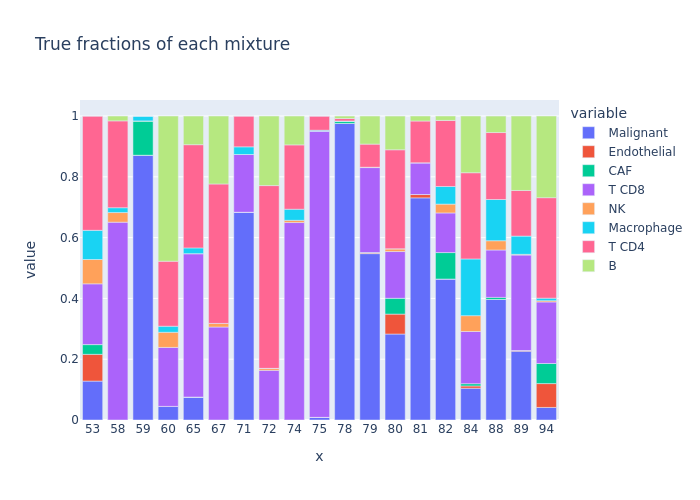

In [12]:
fig = px.bar(
    fractions_truth,  #.astype(index={"mixture_id": str}),
    x=fractions_truth.index.astype(str),
    y=fractions_truth.columns,
    title="True fractions of each mixture"
)

fig.show()

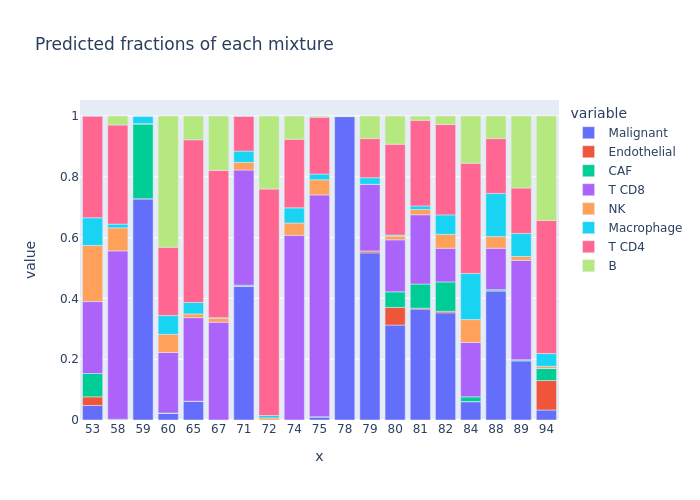

In [13]:
fig = px.bar(
    fractions_csx,  #.astype(index={"mixture_id": str}),
    x=fractions_csx.index.astype(str),
    y=fractions_csx.columns,
    title="Predicted fractions of each mixture"
)

fig.show()

In [14]:
signature_matrix = pd.read_csv(
    os.path.join(experiment_uri, 
                 "CIBERSORTx_screfsampletirosh_inferred_phenoclasses.CIBERSORTx_screfsampletirosh_inferred_refsample.bm.K999.txt"
#                  "CIBERSORTx_nferredphenoclassesdefaults.CIBERSORTx_nferredphenoclassesfromdefaults.bm.K999.txt"
                ),
    sep="\t",
    index_col=0
).rename_axis(index="gene").rename(columns=weird_to_nice)

signature_matrix

FileNotFoundError: 